In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons,make_classification,make_circles,make_swiss_roll, load_iris
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D
from scipy import exp
from scipy.linalg import eigh
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from time import time
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, laplacian_kernel, sigmoid_kernel

In [12]:
#kernel pca function

def kernel_pca(x,n_components,kernel):
    if kernel == "RBF":
        K = rbf_kernel(x,gamma=1)
    elif kernel == "Polynomial":
        K = polynomial_kernel(x,gamma=3)
    elif kernel == "Sigmoid":
        K = sigmoid_kernel(x,gamma=0.1)
    # Centering gram matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenvalues 
    eigvals, eigvecs = eigh(K)

    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    kernel_x = np.column_stack([eigvecs[:,-i] for i in range(1,n_components+1)])
    
    eigsort = np.sort(eigvals)[::-1]
    variance = sum(eigsort[0:n_components])/sum(eigvals)
    
    return kernel_x, variance


In [8]:
#loading datasets

x_moon, y_moon = make_moons(n_samples=1000, noise=0.09, random_state=69)
x_circle, y_circle = make_circles(n_samples = 1000, noise = 0.10, factor=0.5)
x_class, y_class = make_classification(n_samples=1000,n_features=20)
x_swiss, y_swiss = make_swiss_roll(n_samples=1000, noise = 0.04)

x_iris = load_iris().data
y_iris = load_iris().target

In [155]:
y_swiss

array([12.0572479 ,  6.10396364, 13.87770996, ...,  9.23102638,
        8.45113558,  6.38972532])

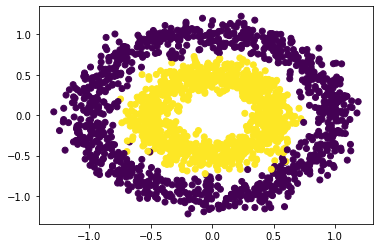

In [149]:
#saving visualisations of original datasets

plt.scatter(x[:,0],x[:,1],c=y)
#plt.savefig("noise fourclass", bbox_inches='tight',dpi = 200)

In [229]:
#saving results in a dataframe

methods = ["None","RBF","Polynomial","Sigmoid"]
datasets = ["Moon","Circle","Class","SwissRoll","Iris"]
timedf = pd.DataFrame(index=datasets,columns=methods)
accdf = pd.DataFrame(index=datasets,columns=methods)

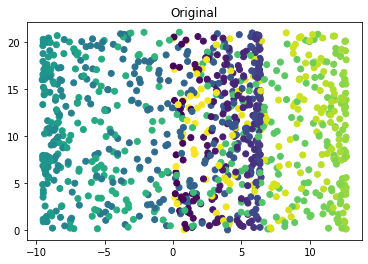

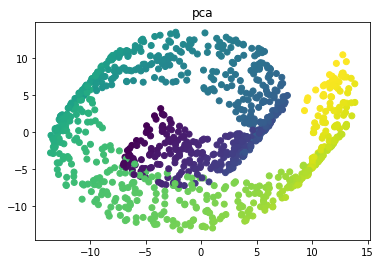

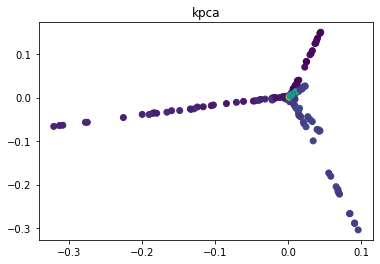

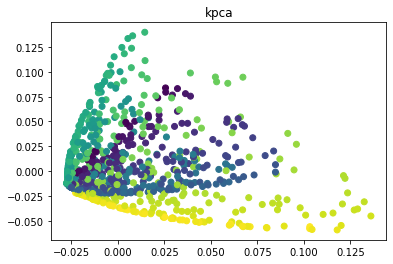

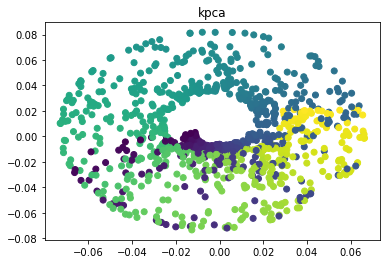

In [267]:
#for experiments and saving visualisations

x = x_swiss
y = y_swiss
p = datasets[3]

plt.figure()
plt.scatter(x[:,0],x[:,1],c=y)
plt.title("Original")
plt.savefig("original"+p, bbox_inches='tight',dpi = 200)

#pca iris
t0 = time()
pca = PCA(2)
pca = pca.fit_transform(x)
t1 = time()
plt.figure()
plt.scatter(pca[:,0],pca[:,1],c=y)
plt.title("pca")
plt.savefig("pca"+p, bbox_inches='tight',dpi = 200)

# clf = SVC(kernel="linear")
# clf.fit(pca,y)
# labels = clf.predict(pca)
# timedf.loc[p,"None"] = t1-t0
# accdf.loc[p,"None"] = accuracy_score(labels,y)*100

#kernel pca
kernels = ["RBF","Polynomial","Sigmoid"]
for i in kernels:
    t0 = time()
    kpca,variance = kernel_pca(x,2,i)
    t1 = time()
    plt.figure()
    plt.scatter(kpca[:,0],kpca[:,1],c=y)
    plt.title("kpca")
    plt.savefig("kpca"+p+i, bbox_inches='tight',dpi = 200)

#     clf = SVC(kernel="linear")
#     clf.fit(kpca,y)
#     labels = clf.predict(kpca)
#     timedf.loc[p,i] = t1-t0
#     accdf.loc[p,i] = accuracy_score(labels,y)*100

In [262]:
accdf.iloc[[0,1,2,4],:]

,None,RBF,Polynomial,Sigmoid
Moon,87.9,95.5,72,86.4
Circle,54.1,68.8,61.3,56.8
Class,95.2,50.3,56.7,94.4
Iris,96.6667,93.3333,76.6667,28.6667


In [253]:
timedf

,None,RBF,Polynomial,Sigmoid
Moon,0.00103068,0.191455,0.158338,0.167753
Circle,0,0.188489,0.156218,0.173356
Class,0.00196171,0.494407,0.292184,0.305078
SwissRoll,0.00101233,0.211433,0.124624,0.189693
Iris,0.000993252,0.00199509,0.00199461,0.000989199
